# Customer Churn:

- Customer Churn is a critical metric in business and data anlytics. Customer churn is like when people decide to stop using a particular service or buying products from a specific company.

- Understanding customer churn and the reasons why it happens, helps businesses figure out why customers are leaving and what they can do to keep more potential customers happy and engaged

In this study, i will use a bank churn dataset to understand why customers are exiting and what strategies could be implemented to fix this

# Data Dictionary

- **RowNumber**: The sequential number assigned to each row in the dataset.
- **CustomerId**: A unique identifier assigned to each customer.
- **Surname**: The last name of the customer.
- **CreditScore**: A numerical representation of a customer's creditworthiness.
- **Geography**: The geographic location or region associated with the customer.
- **Gender**: The gender of the customer (e.g., Male or Female).
- **Age**: The age of the customer.
- **Tenure**: The duration of time (in years) the customer has been with the company.
- **Balance**: The amount of money held in the customer's account
- **NumOfProducts**: The number of products/services the customer has with the company.
- **HasCrCard**: A binary indicator (1 or 0) representing whether the customer has a credit card with the company.
- **IsActiveMember**: A binary indicator (1 or 0) indicating whether the customer is an active member.
- **EstimatedSalary**: An estimate of the customer's salary.
- **Exited**: A binary indicator (1 or 0) representing whether the customer has exited or stopped using the company's services (1 for exited, 0 for not exited).

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Churn_Modelling.csv')

In [2]:
# used to explore the number of rows and columns
df.shape

(10000, 14)

This dataset has 14 fetures and 10000 observations

In [3]:
# used to display the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# displays summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# used to identify missing values in a dataset
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Observation: This data is clean

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Identifying Categorical and Numerical features

In [7]:
categorical_features = df.select_dtypes(include=['object', 'category'])
numerical_features = df.select_dtypes(include=['int', 'float'])

In [8]:
print("Categorical Variables:")
print(categorical_features.columns)

print("\nNumerical Variables:")
print(numerical_features.columns)

Categorical Variables:
Index(['Surname', 'Geography', 'Gender'], dtype='object')

Numerical Variables:
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


These are the categorical and numerical fetaures in this data

## The continous and discrete variables

In [9]:
# Identify continuous and discrete variables
continuous_vars = []
discrete_vars = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        if len(df[column].unique()) > 20:
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

# Print the identified variables
print("Continuous Variables:")
print(continuous_vars)

print("\nDiscrete Variables:")
print(discrete_vars)

Continuous Variables:
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

Discrete Variables:
['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


## Analysis on these variables to understand the data

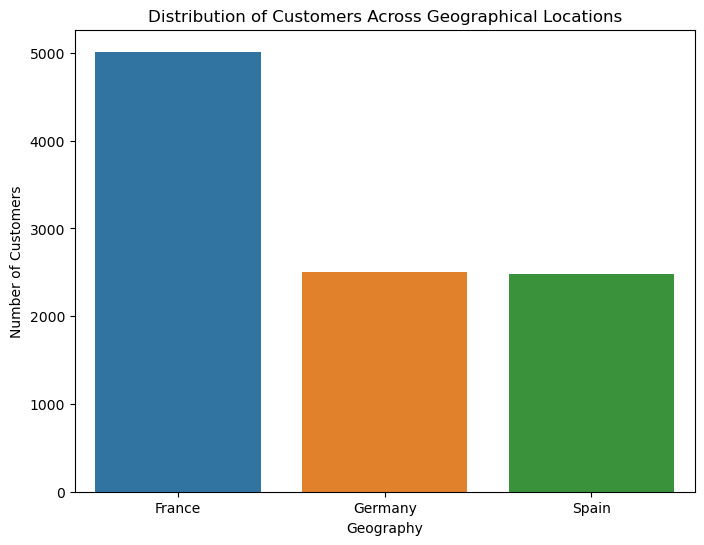

In [10]:
# Distribution of customers across different geographical locations
import seaborn as sns
geo_distribution = df['Geography'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', data=df, order=geo_distribution.index)
plt.title('Distribution of Customers Across Geographical Locations')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

Observation: These are the countries which the customers are based in

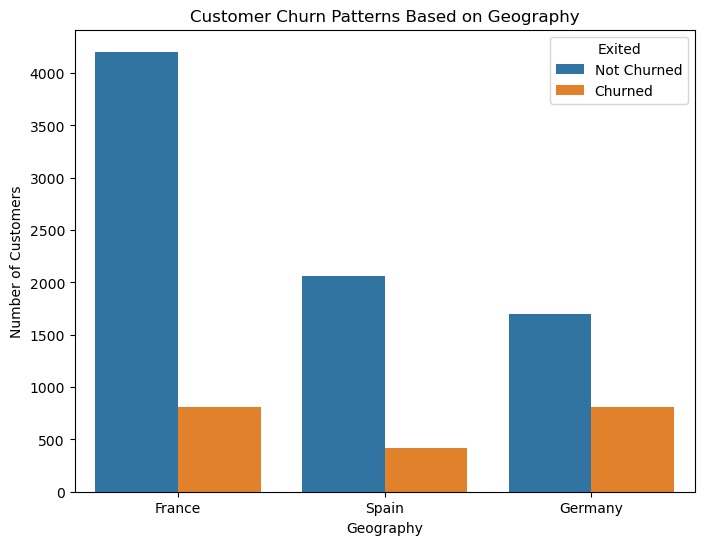

In [11]:
# Patterns in customer churn based on geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Customer Churn Patterns Based on Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])
plt.show()

Observation: The chart above displays the churn/not churn based on customers geography

Gender Distribution:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


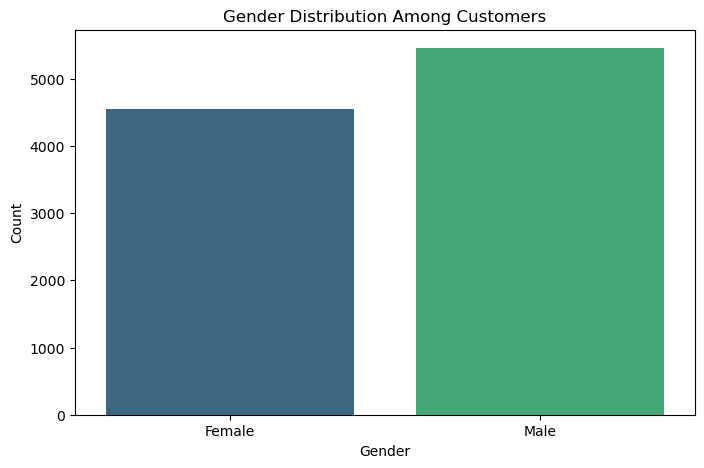

In [12]:
gender_distribution = df['Gender'].value_counts()

# Displaying the counts
print("Gender Distribution:")
print(gender_distribution)

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution Among Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Observation: The male gender is higher than female in this data

In [13]:
from sklearn.preprocessing import LabelEncoder
# Encode 'Gender' column into numerical values
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Calculate the correlation coefficient
correlation_coefficient = df['Gender_encoded'].corr(df['CreditScore'])

# Displaying the correlation coefficient
print("Correlation Coefficient between Gender and Credit Score:", correlation_coefficient)


Correlation Coefficient between Gender and Credit Score: -0.0028566201204472974


Observation:

The correlation coefficient quantifies the strength and direction of a linear relationship between two variables.

The correlation coefficient between gender and credit score is approximately -0.0029.

This suggests a very weak negative correlation, indicating a minimal tendency for credit scores to decrease, though the relationship is almost negligible.

The data implies that gender has little to no significant impact on predicting variations in credit scores.

- What is the average credit score of customers?
- How does the credit score vary for customers who exited vs. those who didn't?

In [14]:
average_credit_score = df['CreditScore'].mean()
print(f"The average credit score of customers is: {average_credit_score:.2f}")


exited_credit_score = df[df['Exited'] == 1]['CreditScore']
not_exited_credit_score = df[df['Exited'] == 0]['CreditScore']


print("\nCredit Score Statistics for Customers who Exited:")
print(exited_credit_score.describe())

print("\nCredit Score Statistics for Customers who Didn't Exit:")
print(not_exited_credit_score.describe())

The average credit score of customers is: 650.53

Credit Score Statistics for Customers who Exited:
count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

Credit Score Statistics for Customers who Didn't Exit:
count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64


Observation:

2037 Customers churned

7963 Customers didn't exit


## How long, on average, do customers stay with the bank (tenure)?

In [15]:
# Calculate the average tenure
average_tenure = df['Tenure'].mean()
print(f"Average Tenure: {average_tenure:.2f} years")

Average Tenure: 5.01 years


## Are there tenure patterns related to customer churn?

In [16]:
from scipy.stats import ttest_ind
exited_tenure = df[df['Exited'] == 1]['Tenure']
not_exited_tenure = df[df['Exited'] == 0]['Tenure']

# Perform a t-test
t_stat, p_value = ttest_ind(exited_tenure, not_exited_tenure, equal_var=False)

# Display results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in tenure patterns between customers who exited and those who didn't.")
else:
    print("There is no significant difference in tenure patterns between customers who exited and those who didn't.")


T-Statistic: -1.3843
P-Value: 0.1664
There is no significant difference in tenure patterns between customers who exited and those who didn't.


In [17]:
# Calculating the correlation between account balance and the number of products
correlation_balance_products = df['Balance'].corr(df['NumOfProducts'])

print(f"Correlation between Account Balance and Number of Products: {correlation_balance_products}")


Correlation between Account Balance and Number of Products: -0.3041797383605491


Observation:

The correlation coefficient of -0.30417973836055023 denotes a moderate negative correlation between account balance and the number of products.

The negative sign indicates an inverse relationship, suggesting that as account balance increases, the number of products tends to decrease to a moderate extent. While the correlation is not highly pronounced, it implies a discernible tendency for customers with higher account balances to exhibit a comparatively lower number of products within the observed dataset.

## How does the number of products vary between active and inactive members?

In [18]:
# Assuming 'IsActiveMember' is a binary variable (1 for active, 0 for inactive)
products_active = df.loc[df['IsActiveMember'] == 1, 'NumOfProducts']
products_inactive = df.loc[df['IsActiveMember'] == 0, 'NumOfProducts']

# Calculate averages for active and inactive members
average_active = products_active.mean()
average_inactive = products_inactive.mean()

print(f"The average number of products for active members is: {average_active}")
print(f"The average number of products for inactive members is: {average_inactive}")


The average number of products for active members is: 1.5356241506503592
The average number of products for inactive members is: 1.5244380284594763


- What percentage of customers have a credit card?

- Is there a relationship between having a credit card and customer churn?

In [19]:
# Calculate the percentage of customers with a credit card
percentage_with_credit_card = (df['HasCrCard'].sum() / df['HasCrCard'].count()) * 100
print(f"Percentage of customers with a credit card: {percentage_with_credit_card:.2f}%")

Percentage of customers with a credit card: 70.55%


Observation: The percentage of customers with credit card is 70.55%

In [20]:
from scipy.stats import chi2_contingency

# Create a contingency table for the Chi-square test
contingency_table = pd.crosstab(df['HasCrCard'], df['Exited'])

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"Chi-square value: {chi2:.4f}")
print(f"P-value: {p:.4f}")


alpha = 0.05

# Check if the p-value is less than the significance level
if p < alpha:
    print("There is a significant relationship between having a credit card and customer churn.")
else:
    print("There is no significant relationship between having a credit card and customer churn.")


Chi-square value: 0.4713
P-value: 0.4924
There is no significant relationship between having a credit card and customer churn.


Observation:

In a chi-square test, the p-value is a measure of the evidence against a null hypothesis. The null hypothesis in a chi-square test typically posits that there is no association or difference between the categorical variables being studied.

Given that the p value is not less than alpha (0.05), then i wil fail to reject the null hypthesis

Therefore there is no significant relationship or association between having a credit card and a customer churning

- What proportion of customers are active members?

- How does customer activity relate to their credit score?

In [21]:
total_customers = len(df)
active_members = df['IsActiveMember'].sum()

proportion_active_members = active_members / total_customers
print(f"The proportion of active members is: {proportion_active_members:.2%}")

The proportion of active members is: 51.51%


In [22]:
correlation = df['IsActiveMember'].corr(df['CreditScore'])

print(f"The correlation between customer activity and credit score is: {correlation:.2f}")


The correlation between customer activity and credit score is: 0.03


Observation:

A correlation coefficient of 0.03 between customer activity and credit score suggests a very weak positive linear relationship.

The value is close to zero, indicating that there is minimal association between these two variables.

Changes in one variable (customer activity) are not significantly predicting or explaining changes in the other variable (credit score), and vice versa.

# The relationship between geography and customer churn

In [23]:
# Pivot Table - Geography vs. Exited
geo_exit_pivot = pd.pivot_table(df, values='Exited', index='Geography', aggfunc='mean')


print(geo_exit_pivot)

             Exited
Geography          
France     0.161548
Germany    0.324432
Spain      0.166734


Observation:
Germany ranks higher in this analysis. The bank should aim to improve its service to its Customers based in Germany

# Analyze the average credit score based on gender.

In [24]:
# Pivot Table - Gender vs. CreditScore
gender_credit= pd.pivot_table(df, values='CreditScore', index='Gender', aggfunc='mean')

print(gender_credit)

        CreditScore
Gender             
Female   650.831389
Male     650.276892


Observation:

There's no significant difference between the both gender's average credit score

# Relationship between Age and Churn

In [25]:
# Separate data for customers who exited and those who didn't
exited_age = df[df['Exited'] == 1]['Age']
not_exited_age = df[df['Exited'] == 0]['Age']

# Perform a t-test
t_statistic, p_value = ttest_ind(exited_age, not_exited_age)


print(f'T-test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05 
if p_value < alpha:
    print('There is a significant difference in the average age between customers who exited and those who didn\'t.')
else:
    print('There is no significant difference in the average age between customers who exited and those who didn\'t.')

T-test Statistic: 29.76681499437077
P-value: 1.2399313093427738e-186
There is a significant difference in the average age between customers who exited and those who didn't.


Observation:

The t-test results strongly suggest that there is a meaningful and statistically significant difference in the average age between customers who exited and those who didn't in the studied population.

# Correlation analysis to understand the relationship between account balance and the number of products

In [26]:
# Perform correlation analysis
correlation = df['Balance'].corr(df['NumOfProducts'])

print(f"Correlation between Balance and NumOfProducts: {correlation}")

Correlation between Balance and NumOfProducts: -0.3041797383605491


Observation:

A negative correlation (-0.30417973836055023) indicates that there exists a tendency for a decrease in the account balance to be associated with a slight reduction in the number of products held by the customers.

In [27]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-square Statistic: 242.98534164287963
P-value: 8.785858269303703e-55
Degrees of Freedom: 1
Expected Frequencies Table:
[[3861.2587  987.7413]
 [4101.7413 1049.2587]]


Observation:

The chi-square statistic is 242.99, indicating a strong relationship between the variables.

The p-value is 8.79e-55, highly statistically significant, suggesting that the relationship between the variables is unlikely to be due to chance. The degrees of freedom is 1.

The expected frequencies table indicates that active members exhibit a different churn pattern than non-active members.

## MACHINE LEARNING APPLICATION

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate categorical and numerical features
categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df[numerical_cols], encoded_categorical], axis=1)

X = df_encoded  # Features
y = df['Exited']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")


0:	learn: 0.6124146	test: 0.6122107	best: 0.6122107 (0)	total: 6ms	remaining: 2.99s
100:	learn: 0.2882958	test: 0.3178783	best: 0.3177169 (92)	total: 517ms	remaining: 2.04s
200:	learn: 0.2486924	test: 0.3219238	best: 0.3177169 (92)	total: 1.03s	remaining: 1.53s
300:	learn: 0.2173920	test: 0.3242196	best: 0.3177169 (92)	total: 1.57s	remaining: 1.04s
400:	learn: 0.1928418	test: 0.3267732	best: 0.3177169 (92)	total: 2.06s	remaining: 509ms
499:	learn: 0.1710887	test: 0.3304752	best: 0.3177169 (92)	total: 2.55s	remaining: 0us

bestTest = 0.3177169416
bestIteration = 92

Shrink model to first 93 iterations.
Accuracy: 0.865

Confusion Matrix:
[[1540   67]
 [ 203  190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86

**Accuracy is a commonly used metric for evaluating binary classification models, but it may not always be the best choice, especially when dealing with imbalanced datasets. Other metrics that can be used include precision, recall, F1 score, ROC-AUC, and Matthews Correlation Coefficient (MCC)**

In [76]:
# Get predicted probabilities for the test set
probabilities = model.predict_proba(X_test)
y_prob = probabilities
# Display predicted probabilities for the first few samples
print("Predicted Probabilities:")
print(probabilities[:5, :])

Predicted Probabilities:
[[0.94872618 0.05127382]
 [0.96768499 0.03231501]
 [0.88504772 0.11495228]
 [0.77384645 0.22615355]
 [0.92520941 0.07479059]]


In [77]:
y_pred = y_prob[:, 1] >= 0.5
y_pred

array([False, False, False, ...,  True, False, False])

In [78]:
from sklearn.metrics import f1_score, roc_auc_score
f1_score(y_test, y_pred)

0.5846153846153846

In [79]:
roc_auc_score(y_test, y_prob[:, 1])

0.8765974561040992

Feature Importance:
              Feature  Importance
4       NumOfProducts   29.576972
1                 Age   22.220813
3             Balance   12.759634
8   Geography_Germany    8.156676
6      IsActiveMember    7.933413
7     EstimatedSalary    5.239826
0         CreditScore    4.672086
2              Tenure    4.098457
10        Gender_Male    3.431148
9     Geography_Spain    1.076888
5           HasCrCard    0.834087


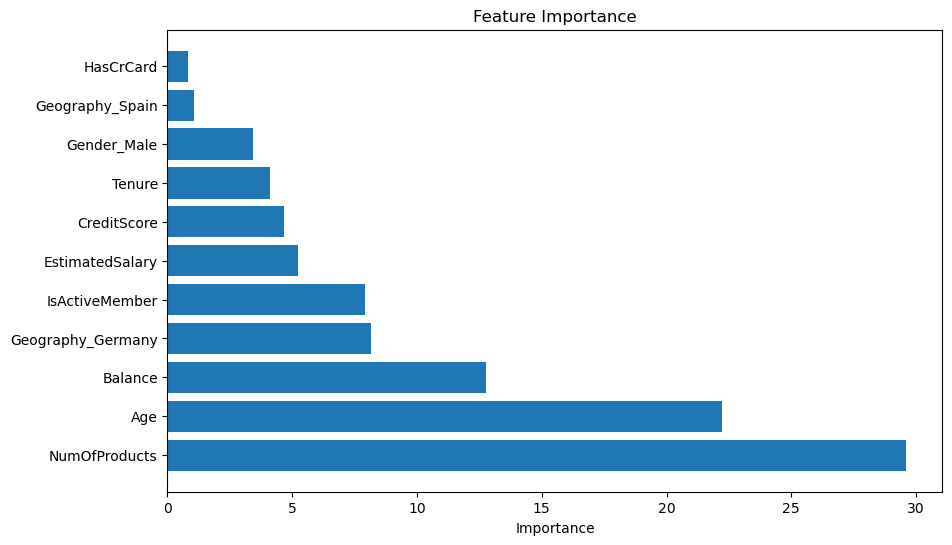

In [80]:
# Get feature importance scores
feature_importance = model.get_feature_importance()

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Observation:

Based on the feature importance, NumOfProducts ranks higher

In [57]:
probabilities = model.predict_proba(X_test)

probabilities_df = pd.DataFrame(probabilities, columns=['Probability_Not_Exited', 'Probability_Exited'])

result_df = pd.concat([df, probabilities_df], axis=1)

# Display the result
result_df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Probability_Not_Exited,Probability_Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.801319,0.198681
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.649706,0.350294
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.373684,0.626316
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.922085,0.077915
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.704010,0.295990


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df[numerical_cols], encoded_categorical], axis=1)

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


X = df_encoded  # Features
y = df['Exited']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Display evaluation metrics for Logistic Regression
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic}")
print(f"\nConfusion Matrix:\n{conf_matrix_logistic}")
print(f"\nClassification Report:\n{class_report_logistic}")


Logistic Regression Model:
Accuracy: 0.811

Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [52]:
# Assuming X_test is your test data
predicted_probabilities = logistic_model.predict_proba(X_test)

In [51]:
logistic_model.predict_proba(X_test)[:,0]

array([0.7673572 , 0.92267574, 0.68447826, ..., 0.6650939 , 0.91863004,
       0.83247099])

In [56]:
probabilities = logistic_model.predict_proba(X_test)


probabilities_df = pd.DataFrame(probabilities, columns=['Probability_Not_Exited', 'Probability_Exited'])


result_df = pd.concat([df, probabilities_df], axis=1)

# Display the result
result_df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Probability_Not_Exited,Probability_Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.767357,0.232643
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.922676,0.077324
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.684478,0.315522
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.565735,0.434265
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.932967,0.067033


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for RandomForestClassifier
print("\nRandomForestClassifier Model:")
print(f"Accuracy: {accuracy_rf}")
print(f"\nConfusion Matrix:\n{conf_matrix_rf}")
print(f"\nClassification Report:\n{class_report_rf}")



RandomForestClassifier Model:
Accuracy: 0.867

Confusion Matrix:
[[1549   58]
 [ 208  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [68]:
probabilities = rf_model.predict_proba(X_test)


probabilities_df = pd.DataFrame(probabilities, columns=['Probability_Not_Exited', 'Probability_Exited'])


result_df = pd.concat([df, probabilities_df], axis=1)

# Display the result
result_df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Probability_Not_Exited,Probability_Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.98,0.02
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.98,0.02
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.74,0.26
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.88,0.12
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.92,0.08


In [61]:
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)


print("\nSupport Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm}")
print(f"\nConfusion Matrix:\n{conf_matrix_svm}")
print(f"\nClassification Report:\n{class_report_svm}")



Support Vector Machine (SVM) Model:
Accuracy: 0.8035

Confusion Matrix:
[[1607    0]
 [ 393    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



In [67]:
# Get decision function scores for each sample
decision_scores = svm_model.decision_function(X_test)


scores_df = pd.DataFrame(decision_scores, columns=['Decision_Score'])


result_df = pd.concat([df, scores_df], axis=1)

# Display the result
result_df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Decision_Score
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,-0.999795
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,-1.000225
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,-0.999875
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,-0.999844
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,-1.000035


- The SVC class in scikit-learn does not have a predict_proba method like some other classifiers (e.g., logistic regression). SVMs typically provide decision function scores rather than probabilities.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df[numerical_cols], encoded_categorical], axis=1)

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


X = df_encoded  # Features
y = df['Exited']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, objective='binary:logistic', random_state=42)

# Create a voting classifier
voting_model = VotingClassifier(estimators=[
    ('catboost', catboost_model),
    ('logistic', logistic_model),
    ('random_forest', rf_model),
    ('svm', svm_model),
    ('xgboost', xgb_model) 
], voting='soft')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_model.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
class_report_voting = classification_report(y_test, y_pred_voting)

# Display evaluation metrics for the combined model
print("Voting Classifier Model with a combination of catboost, logistic regression, randomforest, svm and xgboost:")
print(f"Accuracy: {accuracy_voting}")
print(f"\nConfusion Matrix:\n{conf_matrix_voting}")
print(f"\nClassification Report:\n{class_report_voting}")


0:	learn: 0.6124146	total: 5.61ms	remaining: 2.8s
100:	learn: 0.2882958	total: 575ms	remaining: 2.27s
200:	learn: 0.2486924	total: 1.1s	remaining: 1.64s
300:	learn: 0.2173920	total: 1.71s	remaining: 1.13s
400:	learn: 0.1928418	total: 2.36s	remaining: 584ms
499:	learn: 0.1710887	total: 2.92s	remaining: 0us
Voting Classifier Model with a combination of catboost, logistic regression, randomforest, svm and xgboost:
Accuracy: 0.8695

Confusion Matrix:
[[1573   34]
 [ 227  166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.83      0.42      0.56       393

    accuracy                           0.87      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.87      0.87      0.85      2000



In [70]:

y_probabilities_voting = voting_model.predict_proba(X_test)


probabilities_df = pd.DataFrame(y_probabilities_voting, columns=['Probability_Not_Exited', 'Probability_Exited'])

# Concatenate the original DataFrame and the probabilities DataFrame
result_df = pd.concat([df, probabilities_df], axis=1)

# Display the result
result_df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Probability_Not_Exited,Probability_Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.861037,0.138963
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.951671,0.048329
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.783736,0.216264
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.768626,0.231374
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.907095,0.092905


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate categorical and numerical features
categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df[numerical_cols], encoded_categorical], axis=1)

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Assuming 'Exited' is the target variable and you want to predict it
X = df_encoded  # Features
y = df['Exited']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, objective='binary:logistic', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Display evaluation metrics for the XGBoost model
print("XGBoost Classifier Model:")
print(f"Accuracy: {accuracy_xgb}")
print(f"\nConfusion Matrix:\n{conf_matrix_xgb}")
print(f"\nClassification Report:\n{class_report_xgb}")


XGBoost Classifier Model:
Accuracy: 0.8705

Confusion Matrix:
[[1540   67]
 [ 192  201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.51      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [74]:
probabilities_xgb = xgb_model.predict_proba(X_test)

# Create a DataFrame with predicted probabilities
probabilities_df_xgb = pd.DataFrame(probabilities_xgb, columns=['Probability_Not_Exited', 'Probability_Exited'])


result_df_xgb = pd.concat([df, probabilities_df_xgb], axis=1)

result_df_xgb.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Probability_Not_Exited,Probability_Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.966466,0.033534
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.979490,0.020510
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0.896327,0.103673
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.856168,0.143832
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.948333,0.051667


In [1]:
result_df_xgb

NameError: name 'result_df_xgb' is not defined

# OBSERVATIONS FROM THE MACHINE LEARNING PROCESS

**CATBOOST MODEL:** Accuracy: 0.865

**LOGISTIC REGRESSION:**  Accuracy: 0.811

**RANDOM FOREST CLASSIFIER:**
Accuracy: 0.867

**SVM MODEL:** Accuracy: 0.8035

**Voting Classifier Model with a combination of catboost, logistic regression, randomforest, svm and xgboost:** Accuracy: 0.8695

**XGBOOST MODEL:** Accuracy: 0.8705



XGboost models stood out from other models used to predict the rate of customers churning in the given dataset.

Voting Classifier constitutes a fundamental approach to combining the predictive capabilities of multiple individual models to enhance overall predictive performance.

The Voting Classifier operates on the principle of amalgamating the decisions or predictions made by its constituent models, leveraging a democratic voting mechanism. This ensemble technique supports both binary and multiclass classification tasks, and this is why i considered to use it for this customer churn prediction.

The SVM model performed poorly on this task